In [20]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Mall_Customers.csv')

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Removing customer ID and converting Gender to one hot vector
df.drop(columns = ['CustomerID'],axis = 1,inplace = True)

In [17]:
df = pd.get_dummies(df,drop_first = True)

In [23]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [65]:
df['Age'] = (df['Age']-df['Age'].mean())/(df['Age'].std())
df['Annual Income (k$)'] = (df['Annual Income (k$)']-df['Annual Income (k$)'].mean())/(df['Annual Income (k$)'].std())
df['Spending Score (1-100)'] = (df['Spending Score (1-100)']-df['Spending Score (1-100)'].mean())/(df['Spending Score (1-100)'].std())
df['Gender_Male'] = (df['Gender_Male'] - df['Gender_Male'].mean())/(df['Gender_Male'].std())

In [66]:
cov = df.cov()
print(cov)

                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000           -0.012398               -0.327227   
Annual Income (k$)     -0.012398            1.000000                0.009903   
Spending Score (1-100) -0.327227            0.009903                1.000000   
Gender_Male             0.060867            0.056410               -0.058109   

                        Gender_Male  
Age                        0.060867  
Annual Income (k$)         0.056410  
Spending Score (1-100)    -0.058109  
Gender_Male                1.000000  


In [67]:
# Now we need to find the basis vectors
eigen_values, eigen_vectors = LA.eig(cov)

In [68]:
eigen_vectors.shape

(4, 4)

In [69]:
transformed_data = np.matmul(df,eigen_vectors)

In [70]:
print(transformed_data.shape)

(200, 4)


In [71]:
data_PCA = transformed_data.iloc[:,:2]
print(data_PCA.shape)

(200, 2)


In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters = 4).fit(data_PCA)

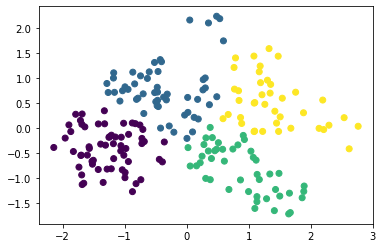

In [75]:
plt.scatter(data_PCA.iloc[:,0],data_PCA.iloc[:,1],c = kmeans.labels_)